In [1]:
## Different between r2 and adjusted r2

To address the limitations of r-squared we are considering the below data. Which has the same sales data, where we remove the dummy_forecast_value. We will be using different combinations of features to build the regression models and to see the behaviour over r-squared vs adjusted r-squared.

We are having 3 features.

- email campaign spend

- google adwords spend

- season

The target is sales values. We are going to build 3 models with the below features combinations.

- Model 01:
   - Features: email campaign spend, google adwords spend 
   - Target: sales
- Model 02:
   - Features: google adwords spend, season 
   - Target: sales
- Model 03:
  -  Features: email campaign, google adwords, season 
  -  Target: sales

# Calculate R-Squared and Adjusted R-Squared In Python

We are going to implement 3 functions: model1 , model2, model3. For each model we will compute the both the r-squared and adjusted r-squared value.

In [2]:
## Requried Python Packages
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [3]:
data_path = pd.read_csv('sales.csv')

In [12]:
data_path

,email_campaign_spend,google_adwords_spend,season,sales,dummy_forecasted_sales
0,2,9,1,12,23
1,3,8,2,24,20
2,4,4,1,34,32
3,1,3,3,12,16
4,6,1,2,34,32
5,4,5,1,23,22
6,8,6,3,34,35
7,10,4,2,13,16
8,20,2,1,34,35
9,12,8,1,56,52


In [13]:
data_path.drop('dummy_forecasted_sales', axis=1, inplace=True)

In [4]:
## Residual sum of squares
def rss_value(actuals, forecasted):

    residuals = actuals - forecasted
    ## Squared each residual
    squared_residuals = [np.power(residual, 2) for residual in residuals]
    rss = sum(squared_residuals)
    return rss

In [5]:
## Total sum of square
def tss_value(actuals):

    ## Calcuate mean
    actual_mean = actuals.mean()
    ## Squared mean difference value
    mean_difference_squared = [np.power(
    (actual - actual_mean), 2) for actual in actuals]
    tss = sum(mean_difference_squared)
    return tss

In [6]:
## R-squared value
def get_r_squared_value(actuals, forecasted):

    rss = rss_value(actuals, forecasted)
    tss = tss_value(actuals)
    ## Calculating R-squared value
    r_squared_value = 1 - (rss/float(tss))
    return round(r_squared_value, 2)

In [7]:

## Adjusted R-squared value
def get_adjusted_r_squared_value(actuals, forecasted, features_size, flag=0):

    observations_size = len(actuals)
    ## Get the r squared value
    r_squared_value = get_r_squared_value(actuals, forecasted)
    numerator = (1 - r_squared_value) * (observations_size - 1)
    denominator = observations_size - features_size - 1
    adjusted_r_squared_value = round(1 - numerator/float(denominator), 2)

    if flag:
        return r_squared_value, adjusted_r_squared_value
    else:
        return adjusted_r_squared_value

In [8]:
## Template for modeling regression algorithm
def regression_model(data, features, target):

    regresser = LinearRegression().fit(data[features], data[target])
    return regresser

In [20]:


def main():

    ## Load dataset
    data = data_path

    ## Creating features set
    features_set_1 = ['email_campaign_spend', 'google_adwords_spend']
    features_set_2 = ['google_adwords_spend', 'season']
    features_set_3 = ['email_campaign_spend', 'google_adwords_spend', 'season']
    target = 'sales'

    ## Building 3 models
    model_1 = regression_model(data, features_set_1, target)
    model_2 = regression_model(data, features_set_2, target)
    model_3 = regression_model(data, features_set_3, target)

    ## Prediction for the 3 models
    predictions_1 = model_1.predict(data[features_set_1])
    predictions_2 = model_2.predict(data[features_set_2])
    predictions_3 = model_3.predict(data[features_set_3])

    ## Capturing each model r-squared and adjsuted r-squared value
    r_sq_1, ad_r_sq_1 = get_adjusted_r_squared_value(
    data[target], predictions_1, len(features_set_1), flag=1)

    r_sq_2, ad_r_sq_2 = get_adjusted_r_squared_value(
    data[target], predictions_2, len(features_set_2), flag=1)

    r_sq_3, ad_r_sq_3 = get_adjusted_r_squared_value(
    data[target], predictions_3, len(features_set_3), flag=1)

    print("****************Model 01****************")
    print("\n R-Squared Value: {}, Adjusted R-Squared Value: {}".format(
    r_sq_1, ad_r_sq_1))

    print("\n****************Model 02****************")
    print("\n R-Squared Value: {}, Adjusted R-Squared Value: {}".format(
    r_sq_2, ad_r_sq_2))

    print("\n****************Model 03****************")
    print("\n R-Squared Value: {}, Adjusted R-Squared Value: {}".format(
    r_sq_3, ad_r_sq_3))

In [21]:
if __name__ == "__main__":
    main()

****************Model 01****************

 R-Squared Value: 0.29, Adjusted R-Squared Value: 0.09

****************Model 02****************

 R-Squared Value: 0.09, Adjusted R-Squared Value: -0.17

****************Model 03****************

 R-Squared Value: 0.3, Adjusted R-Squared Value: -0.05


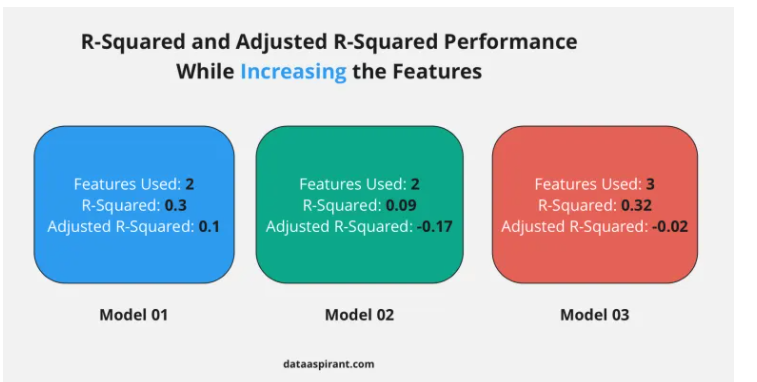

for the model 01 we are having a r-squared value of 03 and adjusted r-squared value of 0.1. Which means the model is not good enough for forecasting sales values.

As a next step we have taken a second feature set to build the regression model, even in the model 02 the results are not so promising. In fact the results are worse than the model 01 results. 

In the last iteration. We have taken all the features of model 01 and added the new feature from model 02.

We know that the model 02 is not performing well, so we should expect the low r-squared and adjusted r-squared. But the model 3 r-squared is more than the model 01 r-squared value. 

This is a limitation of r-squared, if we see the adjusted r-squared value which is much lower than the model 01 adjusted r-squared value. Which is more reasonable. The other thing to note, r-squared value will range in between 0 to 1 whereas adjusted r-squared can be less than 0 and negative.

# Always consider the adjusted r-squared as the evaluation metrics unless we build a model with single feature. In this case both r-squared and adjusted r-squared will be the same.

